In [1]:
# Basics Importation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# For Detailed Stats Output
import statsmodels.api as sm
# The linear regression models 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
# Instantiating the linear regression models
ols = LinearRegression()
ridge = Ridge()
lasso  = Lasso()
lassocv = LassoCV()
elasticnet = ElasticNet()
elasticnetcv = ElasticNetCV()
# The tree model
from sklearn import tree
# Instantiating the tree model (regression type)
regressor = tree.DecisionTreeRegressor()
# The ensemble model for random forest and bagging
from sklearn import ensemble
# Instantiating the ensemble models
randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()
gbm          = ensemble.GradientBoostingRegressor()
abr          = ensemble.AdaBoostRegressor()
# xg boost
import xgboost as xgb
# lg boost
import lightgbm as lgb
# K mean clustering
from sklearn.cluster import KMeans
kmeans = KMeans()

# The model selection for cross validation, k fold splits, train_test_split, grid search etc. 
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Some automatic feature selection functions (recursive finding, best feature selection etc.)
import sklearn.feature_selection as fs
# Importing the different error evaluation/metrics
from sklearn import metrics
from sklearn.metrics import silhouette_score
# regression metrics: 
# metrics.explained_variance_score(y_true, y_pred)
# metrics.max_error(y_true, y_pred)
# metrics.mean_absolute_error(y_true, y_pred)
# metrics.mean_squared_error(y_true, y_pred[, …])
# metrics.mean_squared_log_error(y_true, y_pred)
# metrics.median_absolute_error(y_true, y_pred)
# metrics.r2_score(y_true, y_pred[, …])

# Making it so that we can see all columns of the dataframe
pd.set_option('display.max_columns', None)
# Importing the data
# baseline_df have nominal categories dummified.
baseline_df=pd.read_csv('baseline_df.csv',index_col='Id')
undummified_baseline_df=pd.read_csv('undummified_baseline_df.csv',index_col='Id')

standardized_baseline_df=pd.read_csv('standardized_baseline_df.csv',index_col='Id')
normalized_baseline_df=pd.read_csv('normalized_baseline_df.csv',index_col='Id')

standardized_undummified_baseline_df=pd.read_csv('standardized_undummified_baseline_df.csv',index_col='Id')
normalized_undummified_baseline_df=pd.read_csv('normalized_undummified_baseline_df.csv',index_col='Id')

standardized_with_outlier_dummified_baseline_df=pd.read_csv('standardized_with_outlier_dummified_baseline_df.csv',index_col='Id')
normalized_with_outlier_dummified_baseline_df=pd.read_csv('normalized_with_outlier_dummified_baseline_df.csv',index_col='Id')

standardized_with_outlier_undummified_baseline_df=pd.read_csv('standardized_with_outlier_undummified_baseline_df.csv',index_col='Id')
normalized_with_outlier_undummified_baseline_df=pd.read_csv('normalized_with_outlier_undummified_baseline_df.csv',index_col='Id')

all_standardized_baseline_df=pd.read_csv('all_standardized_baseline_df.csv',index_col='Id')
all_normalized_baseline_df=pd.read_csv('all_normalized_baseline_df.csv',index_col='Id')

with_outlier_dummified_baseline_df=pd.read_csv('with_outlier_dummified_baseline_df.csv',index_col='Id')
with_outlier_undummified_baseline_df=pd.read_csv('with_outlier_undummified_baseline_df.csv',index_col='Id')

all_standardized_with_outlier_dummified_baseline_df=pd.read_csv('all_standardized_with_outlier_dummified_baseline_df.csv',index_col='Id')
all_normalized_with_outlier_dummified_baseline_df=pd.read_csv('all_normalized_with_outlier_dummified_baseline_df.csv',index_col='Id')

##############################################
# Specify which dataframe to work with:
##############################################
df=standardized_undummified_baseline_df
print(df.isnull().sum().sum())
df.sample(10)

0


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
433,160,RM,-2.510929,-1.891467,Pave,No Alley,Reg,Lvl,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,-0.708854,-0.551312,0.045597,-0.591946,Gable,CompShg,HdBoard,HdBoard,BrkFace,2.282358,-0.626310,-0.224563,CBlock,-0.477783,0.134859,-0.532952,ALQ,-0.605601,GasA,0.943033,Y,SBrkr,-1.056425,0.756972,-0.034938,1.189027,-0.251353,-0.923535,1.289016,-1.047334,-0.700287,-0.125797,Min1,-0.851108,-0.876370,Detchd,-0.252210,Unf,0.508623,0.023541,0.286395,0.283633,Y,1,1,0,0,0,0,No Fence,No Shed,0.640834,-0.636436,WD,Normal,11.715874
55,80,RL,-0.352211,-0.516806,Pave,No Alley,Reg,Bnk,Inside,Mod,NAmes,Norm,Norm,1Fam,SLvl,-0.708854,-0.551312,-0.493252,-1.356508,Gable,CompShg,MetalSd,MetalSd,None,-0.576817,-0.626310,-0.224563,CBlock,-0.477783,0.134859,-0.532952,ALQ,-1.743587,GasA,-1.130786,Y,SBrkr,1.036722,-0.800052,-0.048215,-0.781870,-0.251353,-0.923535,-0.724036,0.294977,-0.700287,-0.125797,Min1,0.811426,0.827293,Detchd,-0.627796,Unf,0.508623,0.723614,0.286395,0.283633,Y,0,1,0,0,0,0,MnPrv,No Shed,-1.591216,-0.636436,WD,Normal,11.775297
726,20,RL,-0.352211,-0.562681,Pave,No Alley,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,-1.525986,0.351443,0.011919,-0.639731,Gable,CompShg,HdBoard,Plywood,None,-0.576817,-0.626310,-0.224563,CBlock,-0.477783,0.134859,-0.532952,ALQ,-0.309904,GasA,-1.130786,Y,SBrkr,-0.708153,-0.800052,-1.365299,-0.781870,-0.251353,-0.923535,-0.724036,0.294977,0.948645,-0.867756,Typ,-0.851108,-0.876370,Detchd,0.498962,Unf,0.508623,1.190330,0.286395,0.283633,Y,1,0,0,0,0,0,No Fence,Shed,1.756859,0.876813,WD,Normal,11.699413
1255,60,RL,-0.352211,-0.570327,Pave,No Alley,Reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,0.925411,-0.551312,1.123295,0.984964,Gable,CompShg,VinylSd,VinylSd,Stone,0.122769,1.350227,-0.224563,PConc,0.716674,0.134859,-0.532952,Unf,-0.662351,GasA,0.943033,Y,SBrkr,-1.074014,1.525103,0.737787,-0.781870,-0.251353,0.991303,1.289016,0.294977,0.948645,0.616162,Typ,0.811426,1.395181,BuiltIn,1.083207,Fin,0.508623,-0.204513,0.286395,0.283633,Y,1,1,0,0,0,0,No Fence,No Shed,0.268826,0.120188,WD,Normal,12.016128
295,20,RL,0.847077,0.133350,Pave,No Alley,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,0.108278,-0.551312,-0.560608,-1.452079,Hip,CompShg,HdBoard,HdBoard,Stone,1.232980,-0.626310,-0.224563,CBlock,-0.477783,0.134859,-0.532952,GLQ,1.338832,GasA,-1.130786,Y,SBrkr,2.035804,-0.800052,0.705922,1.189027,-0.251353,-0.923535,-0.724036,0.294977,-0.700287,0.616162,Typ,2.473961,1.395181,Attchd,-1.003382,Fin,0.508623,-0.093138,0.286395,0.283633,Y,1,0,0,0,0,0,No Fence,No Shed,1.384850,0.876813,WD,Normal,12.025755
861,50,RL,-0.652033,-0.382873,Pave,No Alley,Reg,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,0.925411,2.156951,-1.739341,0.698253,Gable,CompShg,Wd Sdng,Wd Sdng,None,-0.576817,1.350227,-0.224563,BrkTil,-0.477783,0.134859,-0.532952,Unf,-0.166535,GasA,-0.093877,Y,SBrkr,-0.539295,0.533798,0.127042,-0.781870,-0.251353,-0.923535,1.289016,0.294977,0.948645,0.616162,Typ,0.811426,1.395181,Detchd,-2.171872,Unf,-0.931883,-1.164462,0.286395,0.283633,Y,0,1,0,0,0,0,GdPrv,No Shed,-0.103183,-0.636436,WD,Normal,12.154521
800,50,RL,-0.352211,-0.499406,Pave,No Alley,Reg,Lvl,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,-0.70885

In [2]:
nominal_var_processed=['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',\
             'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',\
             'Exterior1st','Exterior2nd','MasVnrType','Foundation',\
             'BsmtFinType1','Heating','CentralAir',\
             'Electrical','Functional','GarageType','GarageFinish',\
             'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition','MSSubClass',\
             'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
ordinal_var_processed=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',\
             'HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',\
             'MoSold','YrSold','HeatingQC','KitchenQual','ExterQual','ExterCond','BsmtQual',\
             'BsmtCond','BsmtExposure','FireplaceQu','GarageQual','GarageCond']
cont_var_processed=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF',\
          '1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea']
cont_var_for_tuning=ordinal_var_processed+cont_var_processed

In [3]:
x=df.drop('SalePrice',axis='columns')
y=df.SalePrice

# Train Test Split (ALL FEATURES)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train Test Split (ONLY Nominal Categories)
x_train, x_test, y_train, y_test = train_test_split(x.loc[:,~x.columns.isin(cont_var_for_tuning)], y, test_size=0.3, random_state=0)

# Train Test Split (ONLY CONT. AND ORDINAL)
# x_train, x_test, y_train, y_test = train_test_split(x[cont_var_for_tuning], y, test_size=0.3, random_state=0)

In [4]:
def dummify_column(dataframe,column_name):
    '''
    ### NOTE!!! ### vector operation not working yet!!!! ###
    - dataframe takes the entire dataframe you are working on
    - column_name takes a list of strings, where the strings are the column names
    '''
    for feature in column_name:
        dummified_feature = pd.get_dummies(dataframe.loc[:,feature], prefix=feature, prefix_sep='__',drop_first=True)
        dummified_df = pd.concat([dataframe.drop(feature,axis=1),dummified_feature],axis=1,sort='False')
    return dummified_df

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

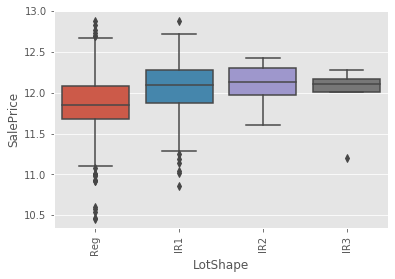

In [5]:
sns.boxplot(x=x.LotShape,y=y)
plt.xticks(rotation=90)

In [6]:
# K mean clustering performed on categorical variables
nominal_var_cluster_num=[]
for cat_var in nominal_var_processed:
    # dummifying the nominal categorical variable
    dummified_column=pd.get_dummies(x.loc[:,cat_var],prefix=cat_var, prefix_sep='__')
    df_for_cluster=pd.concat([y,dummified_column],axis=1,sort='False')
#     print(cat_var)
    # Finding the optimal number of clusters and storing into nominal_var_cluster_num
    kmax = df_for_cluster.shape[1]
    KNumberChoice=range(2, kmax)
    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    # Doing mulitple trials for each category
    cluster_count=[]
    for trial_num in range(0,5):
        sil = []
        for k in range(2, kmax):
            kmeans = KMeans(n_clusters = k).fit(df_for_cluster)
            labels = kmeans.labels_
            sil.append(silhouette_score(df_for_cluster, labels, metric = 'euclidean'))
        if np.argmax(sil)<0.2: # defining threshold for 1 cluster
            cluster_count.append(1)
        else:
            cluster_count.append(KNumberChoice[np.argmax(sil)])
    nominal_var_cluster_num.append(max(set(cluster_count), key=cluster_count.count))
        

In [7]:
# With the known cluster number for each categorical variable, perform the clustering
for ind,cat_var in enumerate(nominal_var_processed):
    dummified_column=pd.get_dummies(x.loc[:,cat_var],prefix=cat_var, prefix_sep='__')
    df_for_cluster=pd.concat([y,dummified_column],axis=1,sort='False')
    kmeans=KMeans(n_clusters=nominal_var_cluster_num[ind]).fit(df_for_cluster)
    x.loc[:,cat_var]=kmeans.labels_

In [8]:
# Removing the columns with pure 0's
temptemp_df=pd.concat([y,x],axis=1,sort='False')
undummified_grouped_baseline_df=temptemp_df.loc[:,(temptemp_df != 0).any(axis=0)]
undummified_grouped_baseline_df.shape

(1215, 52)

In [11]:
# dummifying the grouped_baseline_df
grouped_basline_df_copy=temptemp_df.copy()
for feature in nominal_var_processed:
    grouped_basline_df_copy=dummify_column(grouped_basline_df_copy,[feature])
dummified_grouped_baseline_df=grouped_basline_df_copy
print(dummified_grouped_baseline_df.isnull().sum().sum())
dummified_grouped_baseline_df.shape

0


(1215, 122)

In [12]:
dummified_grouped_baseline_df.columns[~dummified_grouped_baseline_df.columns.isin(cont_var_for_tuning)]

Index(['SalePrice', 'MSZoning__1', 'MSZoning__2', 'LotConfig__1',
       'LotConfig__2', 'Neighborhood__1', 'Neighborhood__2', 'Neighborhood__3',
       'Neighborhood__4', 'Neighborhood__5', 'Neighborhood__6',
       'Neighborhood__7', 'Neighborhood__8', 'Neighborhood__9',
       'Neighborhood__10', 'Neighborhood__11', 'Neighborhood__12',
       'Neighborhood__13', 'Neighborhood__14', 'Neighborhood__15',
       'Neighborhood__16', 'Neighborhood__17', 'Neighborhood__18',
       'Neighborhood__19', 'Neighborhood__20', 'Neighborhood__21',
       'Neighborhood__22', 'Neighborhood__23', 'Condition2__1',
       'Condition2__2', 'Condition2__3', 'Condition2__4', 'BldgType__1',
       'BldgType__2', 'HouseStyle__1', 'HouseStyle__2', 'HouseStyle__3',
       'HouseStyle__4', 'RoofMatl__1', 'RoofMatl__2', 'RoofMatl__3',
       'RoofMatl__4', 'Exterior1st__1', 'Exterior1st__2', 'Exterior1st__3',
       'Exterior1st__4', 'Exterior1st__5', 'Exterior1st__6', 'Exterior1st__7',
       'Exterior2nd__1',

In [13]:
# Removing sub-categories with low counts and their associated observations (if less than 2% of total observation)
boolmatrix=[]
non_cont_columns=dummified_grouped_baseline_df.columns[~dummified_grouped_baseline_df.columns.isin(cont_var_for_tuning)]
for cat_feature in non_cont_columns:
    if dummified_grouped_baseline_df.loc[:,cat_feature].sum()<0.02*dummified_grouped_baseline_df.shape[0]:
        boolvec=(dummified_grouped_baseline_df.loc[:,cat_feature]==1)
        boolmatrix.append(list(boolvec))

In [14]:
# creating boolean vector to takeout observations that have categorical low count observations
reduction_bool_vec=np.any(np.array(boolmatrix).transpose(),axis=1)
temp_df=dummified_grouped_baseline_df[~reduction_bool_vec]
purged_dummified_grouped_baseline_df=temp_df.loc[:,(temp_df != 0).any(axis=0)]
purged_dummified_grouped_baseline_df.shape

(1016, 109)

In [15]:
undummified_grouped_baseline_df.to_csv('undummified_grouped_baseline_df')
purged_dummified_grouped_baseline_df.to_csv('purged_dummified_grouped_baseline_df')

In [16]:
purged_dummified_grouped_baseline_df.sample(10)

,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,MoSold,YrSold,MSZoning__1,MSZoning__2,LotConfig__1,LotConfig__2,Neighborhood__1,Neighborhood__2,Neighborhood__3,Neighborhood__4,Neighborhood__5,Neighborhood__6,Neighborhood__7,Neighborhood__8,Neighborhood__9,Neighborhood__11,Neighborhood__14,Neighborhood__16,Neighborhood__17,Condition2__1,Condition2__3,Condition2__4,BldgType__1,BldgType__2,HouseStyle__1,HouseStyle__2,HouseStyle__3,HouseStyle__4,RoofMatl__1,RoofMatl__2,RoofMatl__4,Exterior1st__1,Exterior1st__2,Exterior1st__3,Exterior1st__4,Exterior1st__5,Exterior1st__6,Exterior1st__7,Exterior2nd__1,Exterior2nd__2,Exterior2nd__3,Exterior2nd__4,Exterior2nd__5,Exterior2nd__6,Exterior2nd__7,MasVnrType__1,MasVnrType__2,Foundation__2,Foundation__3,BsmtFinType1__1,BsmtFinType1__2,BsmtFinType1__3,BsmtFinType1__4,BsmtFinType1__5,BsmtFinType1__6,Heating__1,Heating__2,GarageType__1,GarageType__2,GarageType__3,GarageFinish__1,GarageFinish__2,GarageFinish__3,Fence__1,Fence__2,SaleCondition__1,SaleCondition__2,MSSubClass__1,MSSubClass__2,MSSubClass__3,MSSubClass__4,MSSubClass__5,MSSubClass__6,MSSubClass__7,MSSubClass__8,MSSubClass__9,MSSubClass__10
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
147,11.561725,-0.891890,-0.784146,-0.708854,1.254197,-1.301526,0.459327,-0.576817,-0.626310,-0.224563,-0.477783,0.134859,-0.532952,-0.754943,-1.130786,-0.669457,-0.800052,-1.336090,1.189027,-0.251353,-0.923535,-0.724036,-1.047334,-0.700287,-0.867756,-0.851108,-0.876370,-1.921481,-0.931883,-1.355391,-1.036685,0.283633,1.756859,0.876813,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1171,12.049425,0.607220,0.207171,0.108278,0.351443,0.247665,-0.305235,-0.576817,-0.626310,-0.224563,-0.477783,0.134859,1.490601,0.383043,-1.130786,0.185392,-0.800052,-0.690824,1.189027,-0.251353,-0.923535,-0.724036,0.294977,-0.700287,-0.125797,0.811426,-0.308482,-0.001819,-0.931883,-0.411353,0.286395,0.283633,0.268826,0.120188,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1275,11.842236,-0.771961,-0.983991,-0.708854,0.351443,-2.008765,0.937179,-0.576817,-0.626310,-0.224563,-0.477783,0.134859,-0.532952,-0.916232,0.943033,-1.422286,0.728426,-0.340310,-0.781870,-0.251353,0.991303,-0.724036,0.294977,-0.700287,1.358120,0.811426,1.395181,0.332035,0.508623,0.617543,0.286395,0.283633,1.756859,-0.636436,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
792,11.896833,0.427327,0.590252,0.108278,-0.551312,0.213987,-0.353020,-0.576817,-0.626310,-0.224563,0.716674,0.134859,1.490601,0.182925,-1.130786,-0.011610,-0.800052,-0.839528,1.189027,-0.251353,-0.923535,-0.724036,0.294977,-0.700287,-0.867756,2.473961,0.827293,-0.043551,0.508623,0.548596,0.286395,0.283633,-0.475191,-0.636436,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
608,12.323860,0.727149,-0.341217,-0.708854,2.156951,-0.728999,0.889394,-0.576817,-0.626310,2.617560,-0.477783,1.915883,-0.532952,-0.214325,0.943033,0.164284,1.525103,1.672492,1.189027,-0.251353,2.906140,-0.724036,0.294977,2.597577,1.358120,-0.851108,-0.876370,-1.212041,-0.931883,-1.090212,0.286395,0.283633,0.640834,-1.393061,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
928,12.078245,0.847077,0.212444,0.92

# My Attempt to improve on k mean clustering 
# A Working progress

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn import metrics
# from scipy.spatial.distance import cdist
# import numpy as np
# import matplotlib.pyplot as plt

# # k means determine k
# distortions = []
# kmax = df_for_cluster.shape[1]
# K = range(1,kmax)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(df_for_cluster)
#     kmeanModel.fit(df_for_cluster)
#     distortions.append(sum(np.min(cdist(df_for_cluster, kmeanModel.cluster_centers_, 'euclidean')+0*(k), axis=1)) / df_for_cluster.shape[0])

# # Plot the elbow
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn import metrics
# from scipy.spatial.distance import cdist
# import numpy as np
# import matplotlib.pyplot as plt

# # k means determine k
# K = range(1,df_for_cluster.shape[1])
# penalty_term=np.linspace(0.005,0.01,101)
# distortion_matrix = np.zeros([len(K),len(penalty_term)])
# for i,k in enumerate(K):
#     for j,pen_weight in enumerate(penalty_term):
#         #print(i,j)
#         kmeanModel = KMeans(n_clusters=k).fit(df_for_cluster)
#         kmeanModel.fit(df_for_cluster)
#         distortion_matrix[i,j]=sum(np.min(cdist(df_for_cluster, kmeanModel.cluster_centers_, 'euclidean')+pen_weight*(k), axis=1)) / df_for_cluster.shape[0]
# # The minimum index
# np.unravel_index(np.argmin(distortion_matrix, axis=None), distortion_matrix.shape)
# # Plot the elbow
# plt.pcolor(distortion_matrix)
# plt.colorbar();
# plt.xlabel('Penalization');
# plt.ylabel('k clusters');

# Performing Categorical Var Comparison

In [ ]:
# # Making training dataframe with only categorical variables 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# cat_x_train=x_train[set(x_train.columns)-set(cont_var_for_tuning)]
# # Select Features With Best ANOVA F-Values
# fvalue_selector = fs.SelectKBest(fs.f_classif, k=50)
# X_kbest = fvalue_selector.fit(cat_x_train, y_train)
# # # Show results
# # print('Original number of features:', cat_x_train.shape[1])
# # print('Reduced number of features:', X_kbest.shape[1])